In [556]:
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
import pickle
import lz4.frame
from wremnants import plot_tools, scetlib_corrections,theory_tools
from wremnants import boostHistHelpers as hh
from scipy import special

In [555]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
with lz4.frame.open("/home/k/kelong/work/WRemnants/w_z_gen_dists.pkl.lz4") as minnlof:
    minnlo = pickle.load(minnlof)
minnloh = minnlo["WminusmunuPostVFP"]["output"]["nominal_gen"]*minnlo["WminusmunuPostVFP"]["dataset"]["xsec"]/minnlo["WminusmunuPostVFP"]["weight_sum"]
minnlopdfh = minnlo["ZmumuPostVFP"]["output"]["pdfNNPDF31"]*minnlo["ZmumuPostVFP"]["dataset"]["xsec"]/minnlo["ZmumuPostVFP"]["weight_sum"]
minnlohZ = minnlo["ZmumuPostVFP"]["output"]["nominal_gen"]*minnlo["ZmumuPostVFP"]["dataset"]["xsec"]/minnlo["ZmumuPostVFP"]["weight_sum"]

In [4]:
minnloh

Hist(
  Variable([0, inf], name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  storage=Weight()) # Sum: WeightedSum(value=8452.04, variance=0.407338) (WeightedSum(value=8562.66, variance=0.411874) with flow)

In [537]:
scetlibhZ_tot = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Z/inclusive_Z.npz", add_nonsing=False)
scetlibhZ_A4 = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/inclusive_Z_pT_A4.npz", add_nonsing=False, flip_y_sign=True)

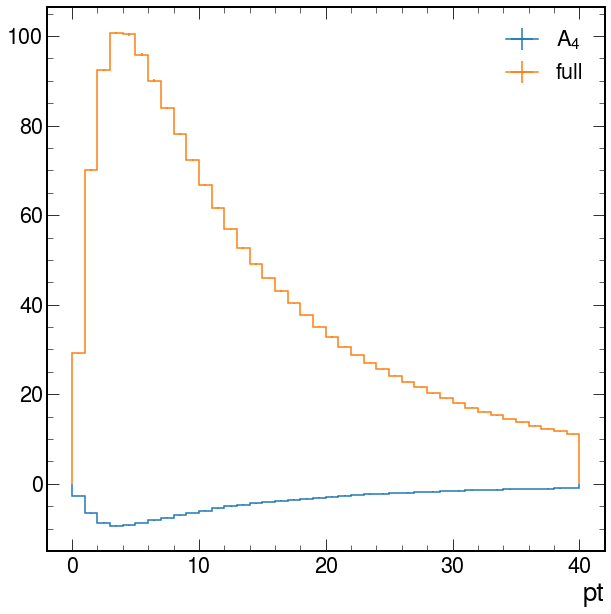

In [538]:
scetlibhZ_A4.project("pt").plot(label="A$_{4}$")
scetlibhZ_tot.project("pt").plot(label="full")
plt.legend()

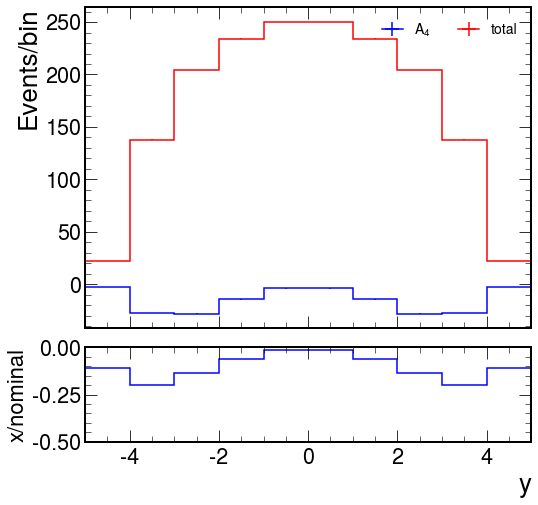

In [539]:
fig = plot_tools.makePlotWithRatioToRef([scetlibhZ_tot.project("y"), scetlibhZ_A4.project("y")], xlim=[-5, 5],colors=["red", "blue",], labels=["total", "A$_{4}$"], rrange=[-0.5, 0], binwnorm=1.)

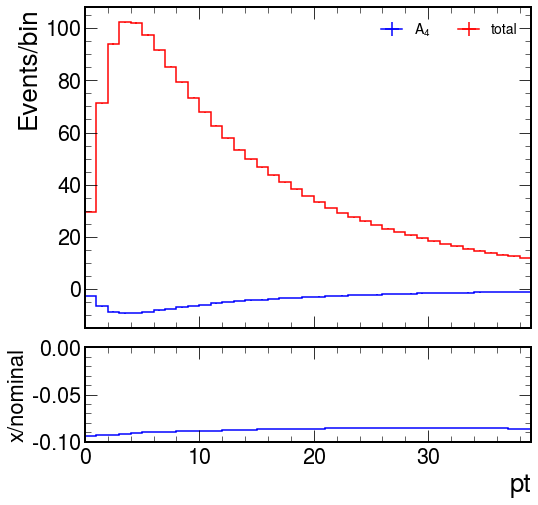

In [520]:
fig = plot_tools.makePlotWithRatioToRef([scetlibhZ_tot.project("pt"), scetlibhZ_A4.project("pt")],colors=["red", "blue",], labels=["total", "A$_{4}$"], rrange=[-0.1, 0], binwnorm=1.)

In [540]:
s = hist.tag.Slicer()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3f7c169210>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

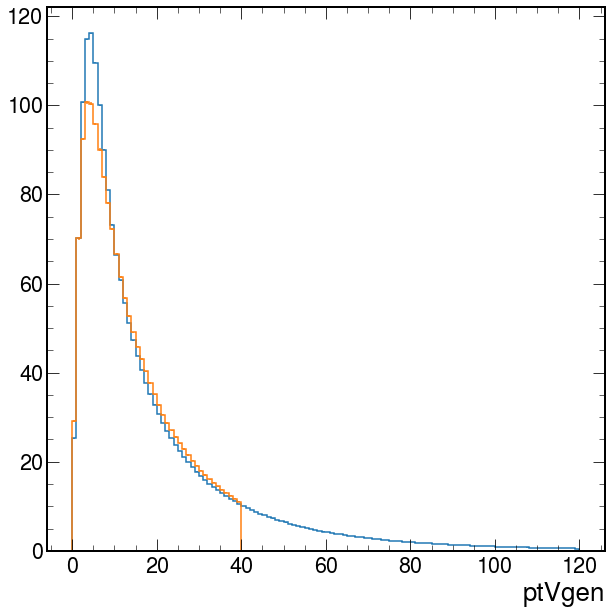

In [541]:
minnlohZ.project("ptVgen").plot(label="scetlib", binwnorm=True)
scetlibhZ_tot.project("pt").plot(label="minnlo")

In [590]:
ax = minnlohZ.axes["ptVgen"]
np.add.reduceat(minnlohZ[0,0,:,0].values(), ax.index([0, 10, 20]))

array([0.58785942, 0.30576305, 0.3483631 ])

In [591]:
np.add.reduceat(minnlohZ[0,0,:,:].values(), ax.index(scetlibhZ_tot.axes["pt"].edges))

array([0.01885402, 0.04989837, 0.06848796, 0.07816618, 0.07575985,
       0.0708943 , 0.06430993, 0.0611103 , 0.05280713, 0.04757137,
       0.0437371 , 0.04162164, 0.03561903, 0.03286893, 0.02921977,
       0.02789761, 0.02554416, 0.02451287, 0.02271473, 0.02202721,
       0.02009685, 0.01821938, 0.01679145, 0.01546929, 0.01420001,
       0.01372404, 0.01324806, 0.01144992, 0.01137059, 0.0111326 ,
       0.01004843, 0.01018064, 0.00944023, 0.00817096, 0.00772142,
       0.00758921, 0.00772142, 0.0064257 , 0.00626705, 0.00671658,
       0.12237926])

In [598]:
axm = minnlohZ.axes["massVgen"]
axy = minnlohZ.axes["absYVgen"]
axpt = minnlohZ.axes["ptVgen"]
minnlohZ[:,:,:,0]

Hist(
  Regular(12, 60, 120, name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.]), name='ptVgen', label='ptVgen'),
  storage=Weight()) # Sum: WeightedSum(value=1883.88, variance=0.0593834) (WeightedSum(value=1976.1, variance=0.0622546) with flow)

In [630]:
ipt = axpt.index(scetlibhZ_tot.axes["pt"].edges)
iy = axy.index(scetlibhZ_tot.axes["y"].edges)

In [636]:
newh = np.add.reduceat(minnlohZ[:,:,:,0].values(), 
    ipt, axis=2
)

In [ ]:
newh = np.add.reduceat(newh, 
    (0,1), axis=1
)
np.sum(newh, axis=1, keepdims=True).shape

In [706]:
hh.makeAbsHist(scetlibhZ_tot, "y")

Hist(
  Integer(0, 1, name='vars', label='vars'),
  Variable([60, 120], name='mass', label='mass'),
  Variable([0, 1, 2, 3, 4, 5], name='y', label='y'),
  Variable(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.]), name='pt', label='pt'),
  storage=Weight()) # Sum: WeightedSum(value=1696.6, variance=1.29941)

In [676]:
# TODO: Make this nd
minnlocorr = minnlohZ.project("ptVgen").copy()
scetlibcorr = minnlohZ.project("ptVgen").copy()
max_pt_corr = scetlibcorr.axes["ptVgen"].index(scetlibhZ_tot.axes["pt"].edges[-1])
scetlibcorr[:max_pt_corr] = scetlibhZ_tot[0,0,...].project("pt").view()
corr = hh.divideHists(scetlibcorr, minnlocorr, cutoff=0.01)

(0.8, 1.2)

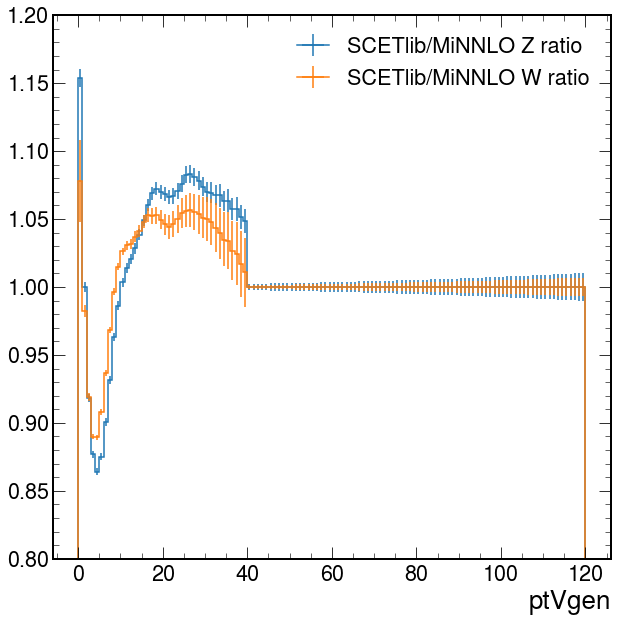

In [701]:
corr.plot(label="SCETlib/MiNNLO Z ratio")
corrW.plot(label="SCETlib/MiNNLO W ratio")
plt.legend()
plt.ylim([0.8,1.2])

In [272]:
minnlocorr[...] = minnlohZ.view(flow=True)*(1-corr[np.newaxis,np.newaxis,:,np.newaxis,])
scetlibcorr = scetlibh[0:1,...]*corr[np.newaxis,np.newaxis,np.newaxis,0:40]

In [273]:
minnloScetlib = minnlocorr.project("ptVgen")
minnloScetlib[:40] = minnloScetlib[:40].view()+scetlibcorr.view()[0,0,0,:]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3f870556c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

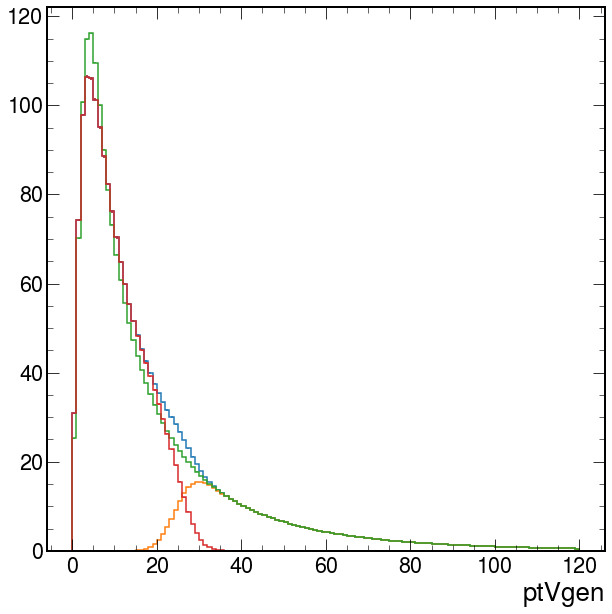

In [276]:
minnloScetlib.plot()
minnlocorr.project("ptVgen").plot()
minnlohZ.project("ptVgen").plot()
scetlibcorr[0,0,0,:].project("pt").plot()

In [ ]:
hists = [corrh_pt] + [x .project("ptVgen") for x in [minnloh, scetlibh, minnlocorr, scetlibcorr]]
labels = [r"MiNNLO$\bigoplus$SCETlib", "MiNNLO", "SCETlib", "MiNNLO turnon", "SCETlib turnoff"]
colors = ["blue", "orange", "purple", "red", "green"]

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=labels, rrange=[0.8, 1.2], binwnorm=1.)#, rlabel="x/MiNNO+Stlib")

In [ ]:
pdfPtV = minnlopdfh.project("ptVgen", "tensor_axis_0")

In [ ]:
diff = hh.addHists(pdfPtV[:, 0], -1*pdfPtV)
diff

In [ ]:
sq = hh.multiplyHists(diff, diff)

In [ ]:
ss = sq.project("ptVgen")

In [ ]:
ss[...] = np.stack((np.sqrt(ss.values()), ss.variances()), axis=-1)

In [ ]:
pdfUp = pdfPtV[:,0]+ss
pdfDown = pdfPtV[:,0]+-1*ss

In [ ]:
fig = plot_tools.makePlotWithRatioToRef([pdfPtV[:,0], pdfUp, pdfDown], colors=["black", "red", "blue"], labels=["nominal", "up", "down"], rrange=[0.95, 1.05], binwnorm=1.)

In [ ]:
newh = hh.addHists(pdfPtV[:,0], -1*pdfPtV)

In [ ]:
newh1 = hh.addHists(pdfPtV[:,0], -1*pdfPtV[:,1])

In [ ]:
scetlibh.project("pt").plot()
minnloh.project("ptVgen").plot()

Hist(
  Integer(0, 1, name='vars', label='vars'),
  Variable([5, 13000], name='mass', label='mass'),
  Variable(array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75,  5.  ]), name='y', label='y'),
  Variable(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.]), name='pt', label='pt'),
  storage=Weight()) # Sum: WeightedSum(value=-1.5072e-12, variance=42.9589)

In [682]:
scetlibh_tot = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm.npz", add_nonsing=True)
scetlibh_A4 = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_A4.npz", add_nonsing=True, flip_y_sign=True)
scetlibh_tot_s = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm.npz", add_nonsing=False)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3f751a1360>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

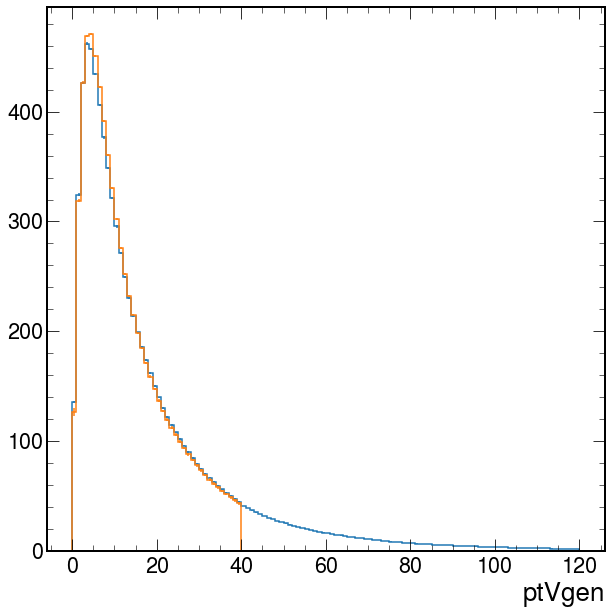

In [684]:
corrh.project("ptVgen").plot()
scetlibh_tot.project("pt").plot()

In [688]:
minnlocorr = minnloh.project("ptVgen").copy()
scetlibcorr = minnloh.project("ptVgen").copy()
scetlibcorr[...,:40] = scetlibh_tot.project("pt").view()
corrW = hh.divideHists(scetlibcorr, minnlocorr, cutoff=0.01)

In [474]:
corr[30.j:40.j].axes["ptVgen"].centers

array([30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5])

In [486]:
x = corr[20.j:40.j].axes["ptVgen"].centers
params = np.polyfit(y=corr[20.j:40.j].values(), x=x, deg = 2)
poly = np.poly1d(params)
xeval = corr[30.j:40.j].axes["ptVgen"].centers

In [487]:
corr_orig = corr.copy()
corr[30:40] = np.stack((poly(xeval), corr[30.j:40.j].variances()), axis=-1)

/opt/venv/lib/python3.10/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in true_divide
  counts = sumw / scale


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3f74ff5ff0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

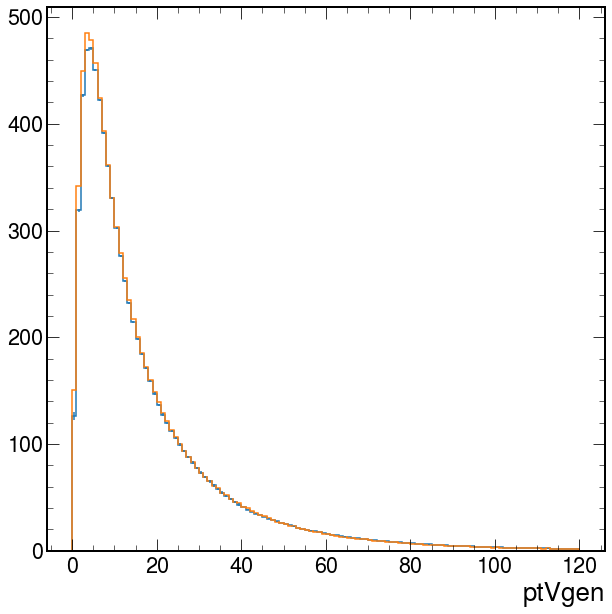

In [690]:
minnloScetlib = hh.multiplyHists(minnlocorr, corrW)
minnloScetlib.plot()
matrixRadish.plot()

Hist(Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.]), name='ptVgen', label='ptVgen'), storage=Weight()) # Sum: WeightedSum(value=8614.34, variance=49.9783) (WeightedSum(value=8676.98, variance=49.986) with flow)

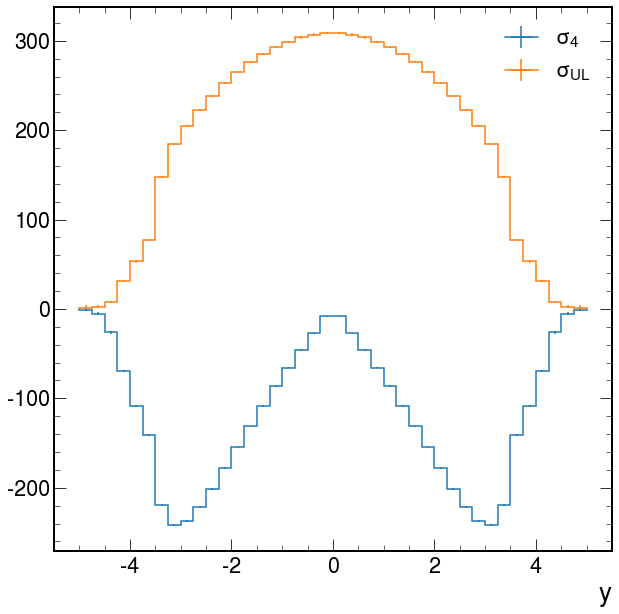

In [362]:
scetlibh_A4.project("y").plot(label=r"$\sigma_{4}$")
scetlibh_tot.project("y").plot(label=r"$\sigma_{\mathrm{UL}}$")
plt.legend()

In [702]:
scetlib_A4_coeff = hh.divideHists(scetlibh_A4, scetlibh_tot, cutoff=0.0001)
scetlib_A4_coeff_pt = hh.divideHists(scetlibh_A4.project("pt"), scetlibh_tot.project("pt"), cutoff=0.0001)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3f7593eb00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

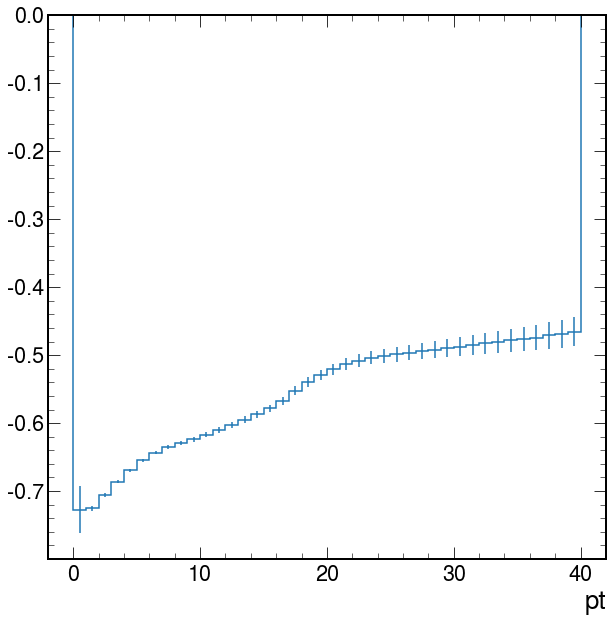

In [703]:
scetlib_A4_coeff_pt.plot()

In [ ]:
scetlibh_A4.project("y").values()

In [ ]:
scetlibh_A4_nons.project("y").plot(label="singular")
scetlibh_A4.project("y").plot(label="nonsingular")
plt.title("A$_{4}$")
plt.legend()

In [ ]:
minnloh

In [ ]:
scetlibh_const

In [ ]:
scetlibh_A0.project("pt").plot(label="A$_{0}$")
(0.1*scetlibh_tot.project("pt")).plot(label="total")
minnloh.project("ptVgen").plot(label="minnlo")
plt.legend()

In [ ]:
scetlibhZ = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/inclusive_Z_pT.npz")

In [ ]:
scetlibhZ.project("pt").plot()
minnlohZ.project("ptVgen").plot(binwnorm=1.)

In [ ]:
scetlibh.project("pt").plot(label="W")
(100*scetlibhZ).project("pt").plot(label="Z")
plt.legend()

In [ ]:
minnloh.project("ptVgen").plot(binwnorm=1., label="MiNNLO")
scetlibh.project("pt").plot(label="SCETlib")

In [ ]:
scetlibhWpt = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-0.4-256-gbe3a9cb8/prod/scetlib_run/W/inclusive_Wm_pT.npz")

In [ ]:
scetlibhWpt[0,...].project("pt").plot(yerr=False)
minnloh.project("ptVgen").plot(binwnorm=1., label="MiNNLO")

In [47]:
scetlibW_y_tot_s = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_y_binMinnlo.npz")
scetlibW_y_tot_nons = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_y_binMinnlo_nons.npz")
scetlibW_y_tot = scetlibW_y_tot_s + scetlibW_y_tot_nons

scetlibW_y_A4_s = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_y_binMinnlo_A4.npz")
scetlibW_y_A4_nons = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm_y_binMinnlo_A4_nons.npz")
scetlibW_y_A4 = scetlibW_y_A4_s + scetlibW_y_A4_nons

#s = hist.tag.Slicer()
yax = scetlibW_y_A4.axes["y"]
scetlibW_y_A4[:,:,yax.index(0):,:] = scetlibW_y_A4[:,:,yax.index(0):,:].view()*-1

In [ ]:
scetlibW_y_tot = scetlib_corrections.readScetlibHist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Wm/inclusive_Wm.npz", add_nonsing=True)

In [49]:
scetlibW_yabs_A4 = makeYAbsHist(scetlibW_y_A4)
scetlibW_yabs_tot = makeYAbsHist(scetlibW_y_tot)

In [ ]:
yax = scetlibW_y_A4.axes["y"]
axs = scetlibW_y_A4.axes

In [50]:
scetlib_absy_A4_coeff = hh.divideHists(scetlibW_yabs_A4.project("y"), scetlibW_yabs_tot.project("y"))

In [ ]:
scetlibW_yabs_A4.project("y").plot()
scetlibW_yabs_tot.project("y").plot()
plt.xlim([0, 4.0])

In [ ]:
hh.divideHists(scetlibW_yabs_A4.project("y"), scetlibW_yabs_tot.project("y")).plot()
plt.xlim([0,4.0])

In [ ]:
scetlibW_y_A4.project("y").plot(label="$\sigma_{4}$")
scetlibW_y_tot.project("y").plot(label="Total")
plt.legend()
plt.xlim([-4.5, 4.5])
plt.title("SCETlib structure functions")

In [33]:
minnlohel = minnlo["WminusmunuPostVFP"]["output"]["helicity_moments_scale"][{"muRfact" : 1.j, "muFfact" : 1.j, "chargeVgen" : -1.j}]

In [121]:
minnlohel[...,:30,4.j]

Hist(
  Variable([0, inf], name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30.]), name='ptVgen', label='ptVgen'),
  storage=Weight()) # Sum: WeightedSum(value=-2.68124e+07, variance=8.32054e+07) (WeightedSum(value=-3.03732e+07, variance=9.64505e+07) with flow)

In [139]:
minnloCoeffs = theory_tools.moments_to_angular_coeffs(minnlohel[...,:30:hist.sum,:].project("absYVgen", "helicity"))

In [127]:
minnloCoeffs[{"helicity" : 4.j}]
#scetlib_absy_A4_coeff.plot()

Hist(Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'), storage=Weight()) # Sum: WeightedSum(value=-13.0678, variance=1.3934e-05)

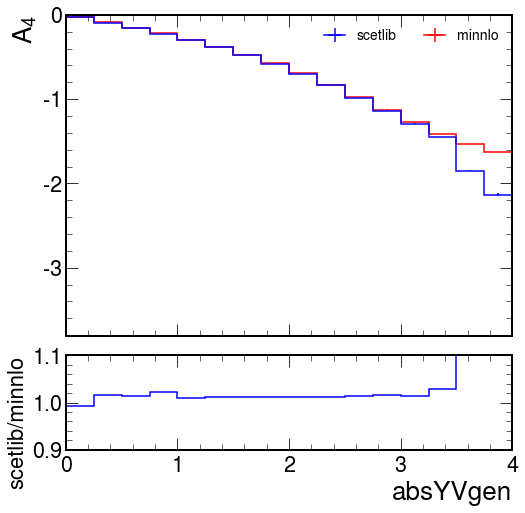

In [142]:
fig = plot_tools.makePlotWithRatioToRef([minnloCoeffs[{"helicity" : 4.j}], scetlib_absy_A4_coeff], colors=["red", "blue"], labels=["minnlo", "scetlib"], ylabel="A$_{4}$", rrange=[0.9, 1.1], rlabel="scetlib/minnlo")

In [ ]:
blah = np.expand_dims(blah, axis=tuple(range(blah.ndim, minnlohel.ndim-blah.ndim)))

In [63]:
minnloByHel = minnlo["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]*minnlo["WminusmunuPostVFP"]["dataset"]["xsec"]/minnlo["WminusmunuPostVFP"]["weight_sum"]
minnloByHel

Hist(
  Variable([0, inf], name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  45.,  50.,  55.,
        60.,  75., 100.]), name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact', label='muRfact'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muFfact', label='muFfact'),
  storage=Weight()) # Sum: WeightedSum(value=75711.4, variance=452505) (WeightedSum(value=76717.5, variance=452656) with flow)

In [77]:
import uproot

In [641]:
f = uproot.open("/eos/user/k/kelong/HistFiles/WGen/WmToMuNu_inclusive_MATRIX_RadISH_MatchEWParams_NNPDF31.root")

In [662]:
matrixRadish = f["wmmunu_matrix_radish/ptW_prefsr_mn"].to_hist()/1000

/opt/venv/lib/python3.10/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in true_divide
  counts = sumw / scale


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3f769aa8f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

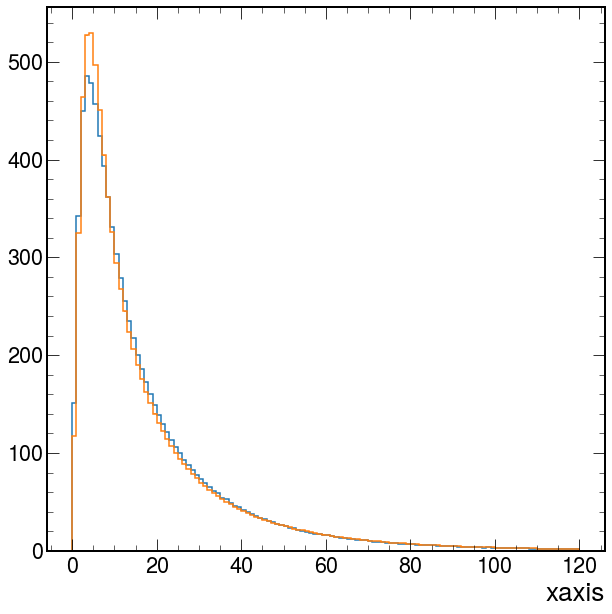

In [663]:
matrixRadish.plot()
minnloh.project("ptVgen").plot()

In [111]:
f = uproot.open("/eos/user/k/kelong/HistFiles/ZGen/ZToMuMu_MATRIX_RadISH_MatchEWParams_NNPDF31.root")

/opt/venv/lib/python3.10/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in true_divide
  counts = sumw / scale


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3f8672f910>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

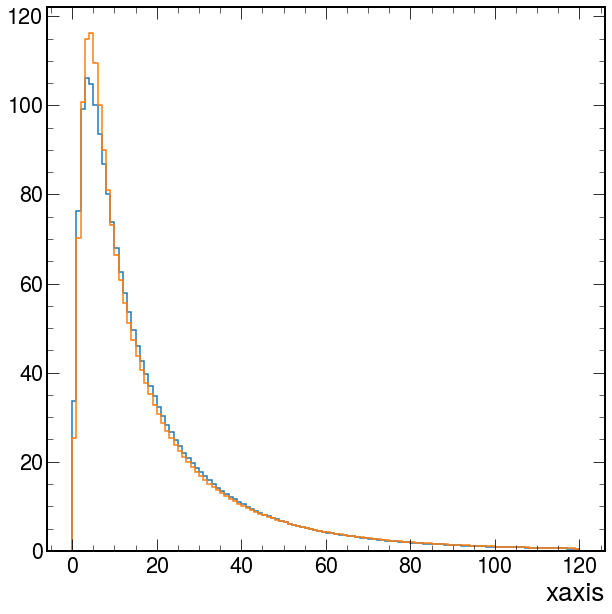

In [113]:
f["DYm50_matrix__radish/ptZ_lhe_mm"].to_hist().plot()
minnlohZ.project("ptVgen").plot()

/opt/venv/lib/python3.10/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in true_divide
  counts = sumw / scale


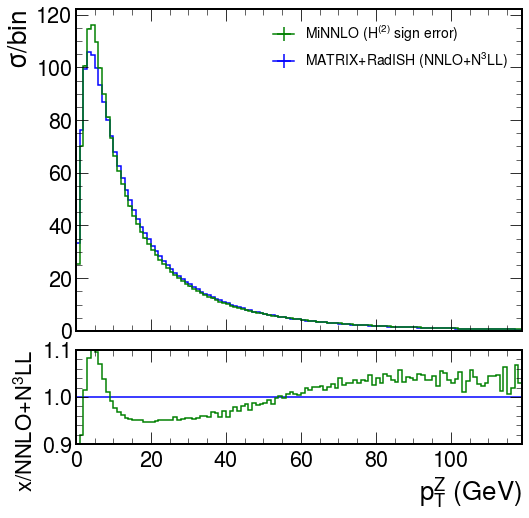

In [294]:
fig = plot_tools.makePlotWithRatioToRef([f["DYm50_matrix__radish/ptZ_lhe_mm"].to_hist(), minnlohZ.project("ptVgen")], colors=["blue", "green", ], labels=["MATRIX+RadISH (NNLO+N$^{3}$LL)", "MiNNLO (H$^{(2)}$ sign error)",], rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{Z}}$ (GeV)", rlabel="x/NNLO+N$^{3}$LL", nlegcols=1)


/opt/venv/lib/python3.10/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in true_divide
  counts = sumw / scale


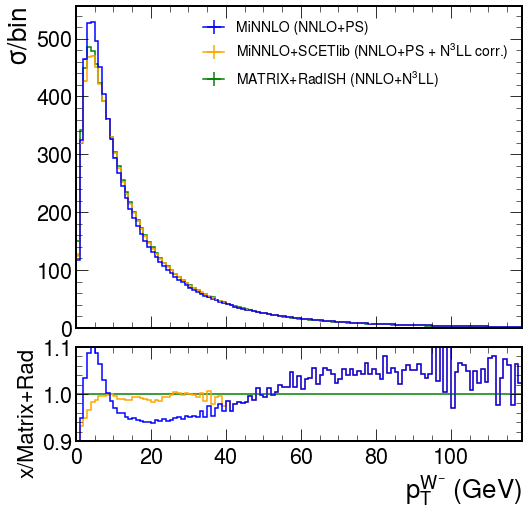

In [699]:
fig = plot_tools.makePlotWithRatioToRef([matrixRadish, minnloScetlib, minnloh.project("ptVgen")],colors=["green", "orange", "blue", ], labels=["MATRIX+RadISH (NNLO+N$^{3}$LL)", "MiNNLO+SCETlib (NNLO+PS + N$^{3}$LL corr.)", "MiNNLO (NNLO+PS)"], rrange=[0.9, 1.1], binwnorm=1., nlegcols=1, rlabel="x/Matrix+Rad", ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{W}^{-}}$ (GeV)")

